In [46]:
import certifi
import json
import numpy as np
import urllib3
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
%matplotlib inline

print("finished")

finished


In [47]:
url = "https://interaktiv.morgenpost.de/data/corona/history.compact.json"

http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())

r = http.request('GET', url)

if (r.status == 200):
    data = json.loads(r.data.decode('utf-8'))

r.status

200

In [50]:
#region_id = "hu"
#region_id = "de"
region_id = "de.be"
ma_period = 7

region = next(filter(lambda e: e[0] == region_id, data))
datasize = len(region[10])

# Select and sanitize data
# current day data is usually wonky so we drop it
infections = np.array(region[10])[:-1]
recoveries = np.array(region[11])[:-1]
deaths = np.array(region[12])[:-1]

# Rolling sum
increments = infections - recoveries - deaths
active = np.cumsum(increments)

# Moving averages
def ma(series):
    lead_in = np.zeros(ma_period - 1, dtype=np.float)
    moving_avgs = np.convolve(series, np.ones(ma_period), 'valid') / ma_period
    return np.concatenate((lead_in, moving_avgs))

infections_ma = ma(infections)
recoveries_ma = ma(recoveries)
deaths_ma = ma(deaths)

# Some matplotlib date stuff
today = mdate.date2num(datetime.date.today())
x = np.arange(today-datasize, today-1)

month_formatter = mdate.DateFormatter('%Y.%m')
month_locator = mdate.MonthLocator()
day_locator = mdate.DayLocator()

region[2]

'Berlin'

plotting data


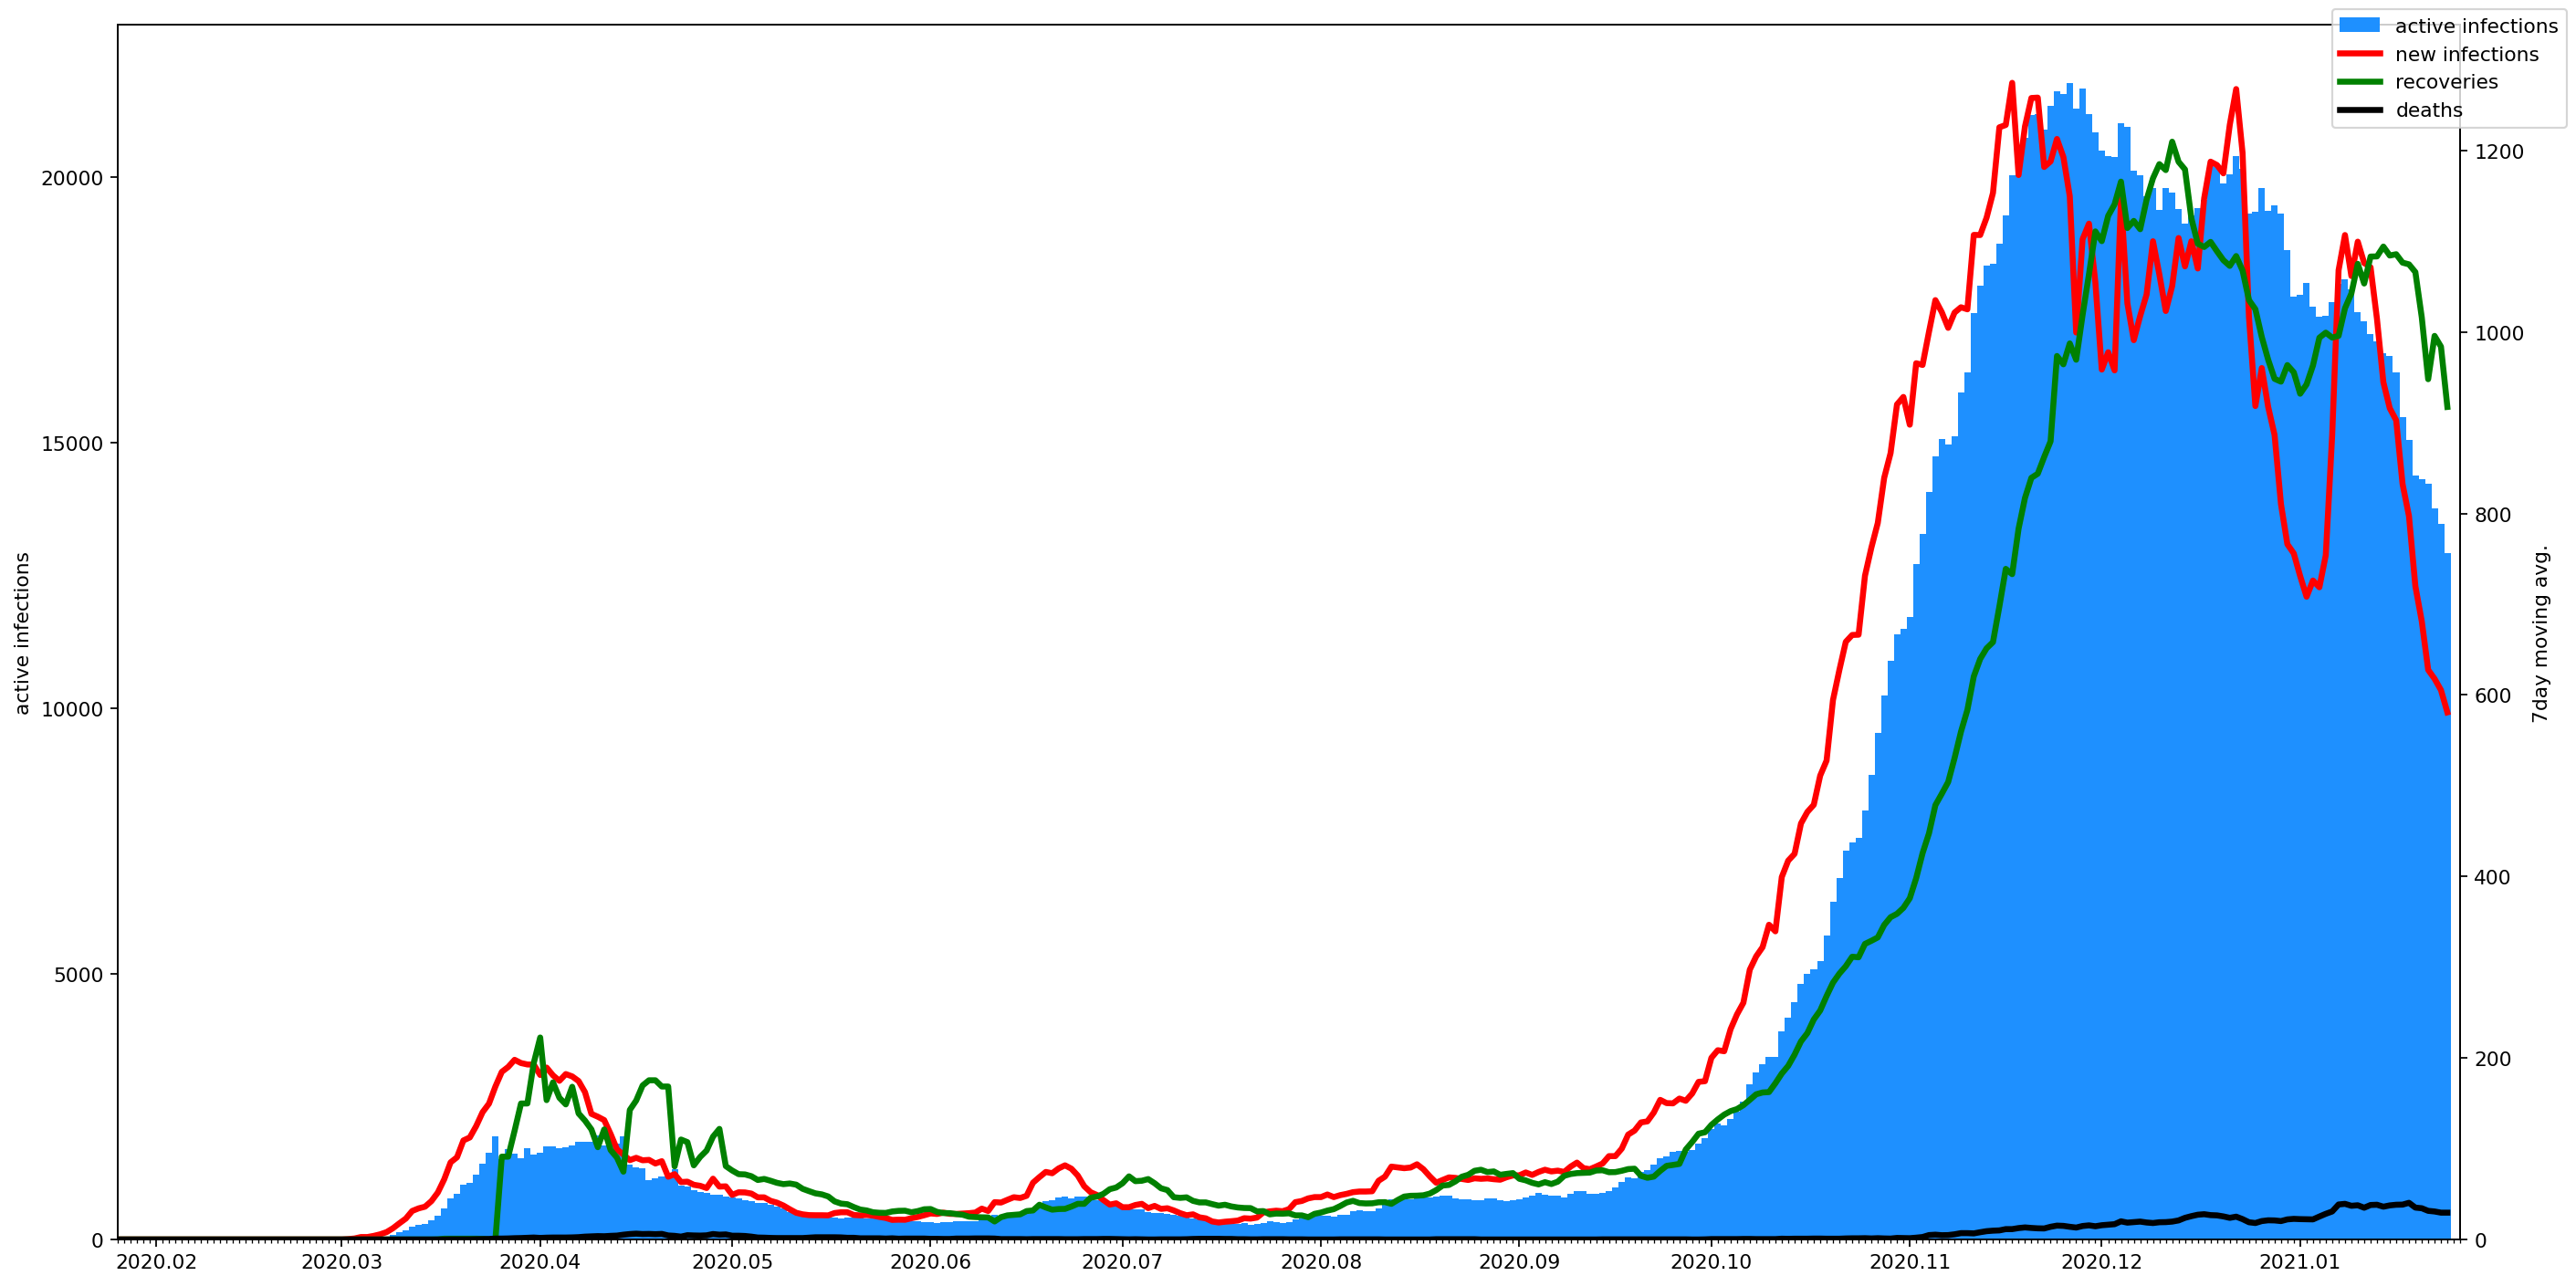

In [51]:
fig1, ax1 = plt.subplots(figsize=(18,9), dpi=157)

ax1.xaxis.set_major_locator(month_locator)
ax1.xaxis.set_major_formatter(month_formatter)
ax1.xaxis.set_minor_locator(day_locator)

ax1.set_xlim(x[0], today)
ax1.bar(x, active, color='dodgerblue', label='active infections', width=1, align='center')
ax1.set_ylabel('active infections')

ax2 = ax1.twinx()
ax2.plot(x, infections_ma, color='red', label='new infections', linewidth=3)
ax2.plot(x, recoveries_ma, color='green', label='recoveries', linewidth=3)
ax2.plot(x, deaths_ma, color='black', label='deaths', linewidth=3)
ax2.set_ylim(ymin=0)
ax2.set_ylabel(str(ma_period) + 'day moving avg.')

fig1.tight_layout()
fig1.legend()

print("plotting data")